In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("../input/my-dataset/credit_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<AxesSubplot:>

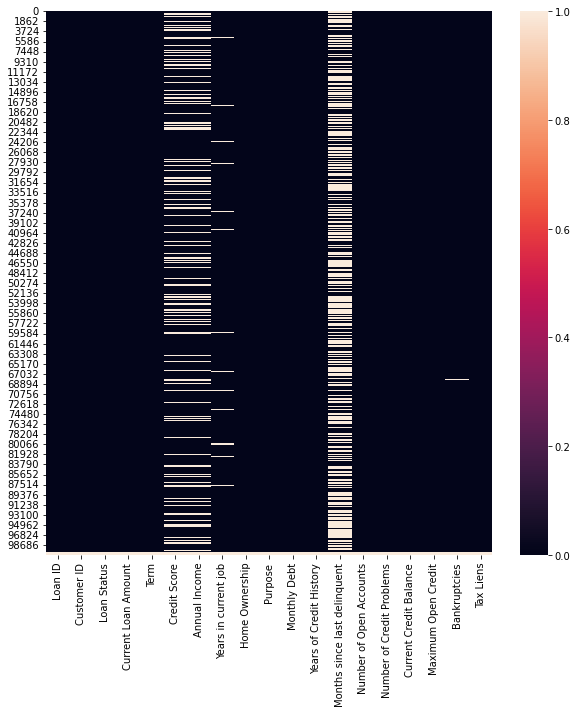

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [8]:
### Months since last delinquent  has more than 50% null values so it is better to be dropped
df.drop("Months since last delinquent",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               80846 non-null   float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  10

In [10]:
df.tail(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Getting the index of all nan values at the end of the dataset
na= df[df['Loan ID'].isnull()].index.tolist()

In [12]:
#droping all Nan 
df.drop(na, inplace=True)

In [13]:
df.tail(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,5.0,1.0,132012.0,242660.0,1.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


<AxesSubplot:>

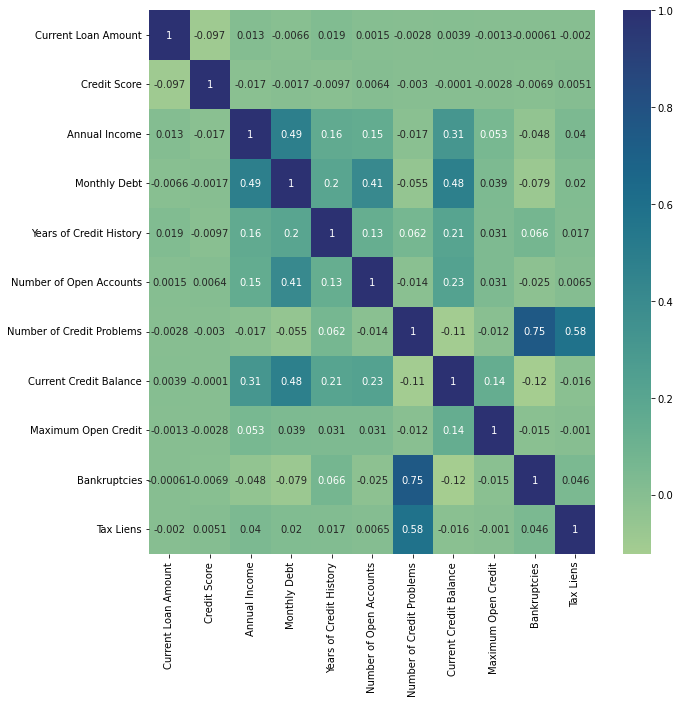

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="crest")

### Bankruptcies has strong correlation Number of Credit Problems

### Taxlines has strong correlation Number of Credit Problems

### Current credit balance has good  relationship with Annual Income

### Current credit balance has  good relationship with monthly debt

### Number of open accounts with monthly debt 

# Term of Loan 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Term', ylabel='count'>

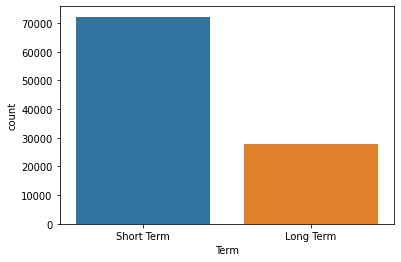

In [15]:
sns.countplot(df["Term"])

#### The plot shows that most of loans are short term loans


In [16]:
df["Term"].value_counts(normalize=True)*100

Short Term    72.208
Long Term     27.792
Name: Term, dtype: float64

#### More than 72% of loans are short term and almost 28% are long term

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Term', ylabel='count'>

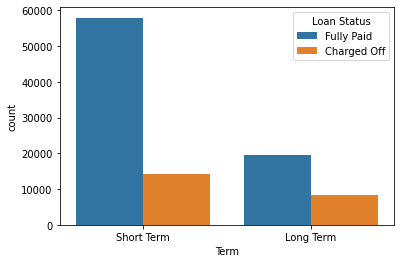

In [17]:
sns.countplot(df["Term"],hue=df["Loan Status"])

# Credit Score Ranges 

In [18]:
df["Credit Score"].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

##### Credir score range is 300 to 850  so values above 850 are invalid
##### it may be a typo , a zero is added to the original score.


In [19]:
def credit_error(value):
    credit_value = value
    credit_value['Credit Score'] = np.where(value['Credit Score'] > 850, value['Credit Score'].values /10, value['Credit Score'])
    return credit_value

In [20]:
credit_error(df)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [21]:
df["Credit Score"].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [22]:
df["Credit Ranges"]=df["Credit Score"].copy()

In [23]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Ranges
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,709.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,NaN
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,741.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,721.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,NaN


In [24]:
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Fair" if np.isreal(val) and (val >= 580 and val < 670) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Excellent" if np.isreal(val) and (val >= 800 and val <= 850) else val)

In [25]:
categ=df["Credit Ranges"].value_counts()

In [26]:
categ

Good         56352
Very Good    18479
Fair          6015
Name: Credit Ranges, dtype: int64

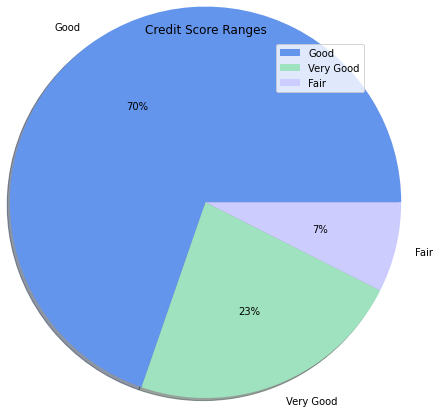

In [27]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
colors=["#6495ED","#9FE2BF","#CCCCFF"]
ax.pie(categ.values,labels = categ.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=1.5)
plt.title("Credit Score Ranges")
plt.legend(categ.index)
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit Ranges', ylabel='count'>

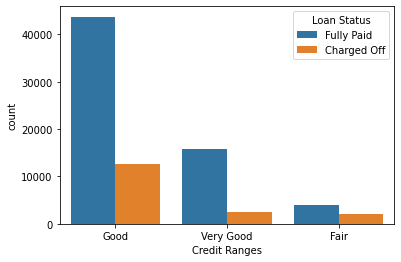

In [28]:
sns.countplot(df["Credit Ranges"],hue=df["Loan Status"])

## Filling Nan values in Credit score and credit range 

In [29]:
seg1 = df[df['Maximum Open Credit']<= 22164912]

In [30]:
seg2 = df[df['Maximum Open Credit'].between(22164912, 798255370)]

In [31]:
seg3 = df[df['Maximum Open Credit'].between(798255370, 1539737892)]

In [32]:
seg1["Credit Ranges"].replace(np.nan,"Fair",inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
seg2["Credit Ranges"].replace(np.nan,"Good",inplace=True)

In [34]:
seg3["Credit Ranges"].replace(np.nan,"Very Good",inplace=True)

In [35]:
## Credit Score 
seg1["Credit Score"].fillna(random.randrange(580,670),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
seg2["Credit Score"].fillna(random.randrange(670,740),inplace=True)

In [37]:
seg3["Credit Score"].fillna(random.randrange(740,800),inplace=True)

In [38]:
data= pd.concat([seg1,seg2,seg3])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              80847 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

# Years in current Job

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Years in current job', ylabel='count'>

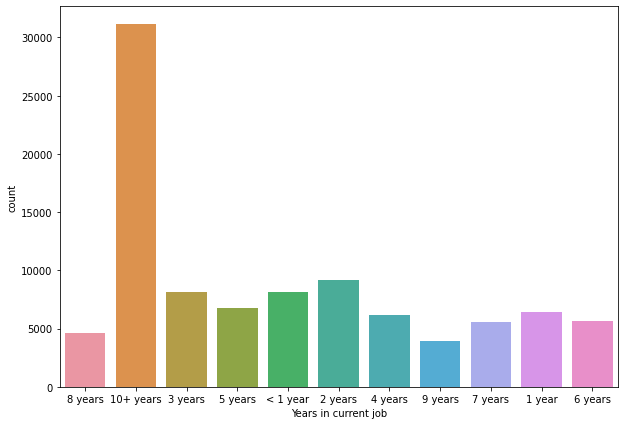

In [40]:
# 'Years in current job' see its distribution
plt.figure(figsize = (10,7))
sns.countplot(data['Years in current job'])

In [41]:
# converting it to numerical type
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")

In [42]:
data['Years in current job'].value_counts()

10    31120
1     14625
2      9133
3      8169
5      6787
4      6143
6      5686
7      5578
8      4582
9      3955
Name: Years in current job, dtype: int64

In [43]:
data = data.astype({"Years in current job":"float64"})

In [44]:
data['Years in current job'].describe()

count    95778.000000
mean         5.977552
std          3.501100
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: Years in current job, dtype: float64

In [45]:
data['Years in current job'].isnull().sum()

4222

##### Filling Nan values with the same distribiution of values

In [46]:
filing=data["Years in current job"].unique()

In [47]:
filing=np.sort(filing)

In [48]:
filing

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [49]:
# deleting Nan value
fill=np.delete(filing,10)

In [50]:
fill

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [51]:
# getting the probability of each value 
prop = data["Years in current job"].sort_values().value_counts(normalize=True, sort=False) 

In [52]:
prop

1.0     0.152697
2.0     0.095356
3.0     0.085291
4.0     0.064138
5.0     0.070862
6.0     0.059366
7.0     0.058239
8.0     0.047840
9.0     0.041293
10.0    0.324918
Name: Years in current job, dtype: float64

In [53]:
# convert the series to list 
prop = prop.to_list()

In [54]:
prop

[0.15269686149220071,
 0.09535592724842866,
 0.08529098540374616,
 0.0641379022322454,
 0.07086178454342333,
 0.0593664515859592,
 0.05823884399340141,
 0.047839796195368454,
 0.04129340767190796,
 0.3249180396333187]

In [55]:
#filling Nan 
data["Years in current job"].fillna(np.random.choice(fill,p=prop),inplace=True)

In [56]:
data["Years in current job"].value_counts()

10.0    35342
1.0     14625
2.0      9133
3.0      8169
5.0      6787
4.0      6143
6.0      5686
7.0      5578
8.0      4582
9.0      3955
Name: Years in current job, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Years in current job', ylabel='count'>

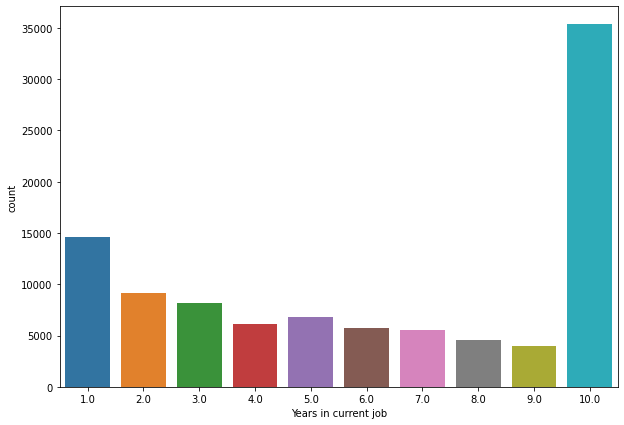

In [57]:
# after filling nan values
plt.figure(figsize = (10,7))
sns.countplot(data['Years in current job'])

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              80847 non-null   float64
 7   Years in current job       100000 non-null  float64
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

# Home ownership

In [59]:
data["Home Ownership"].value_counts()

Home Mortgage    48412
Rent             42192
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [60]:
## HaveMortgage is the same as Home Mortgage  
data["Home Ownership"].replace("HaveMortgage","Home Mortgage",inplace=True)

In [61]:
data["Home Ownership"].value_counts()

Home Mortgage    48626
Rent             42192
Own Home          9182
Name: Home Ownership, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

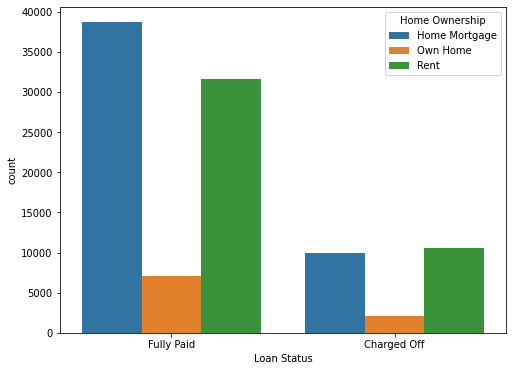

In [62]:
plt.figure(figsize = (8,6))
sns.countplot(data['Loan Status'],hue=data["Home Ownership"])

##### this shows that most of people how  charged off their loans have rent or home mortgae


# Purpose 

In [63]:
# showing percentage of each purpose
data["Purpose"].value_counts(normalize=True)*100

Debt Consolidation      78.551
other                    6.037
Home Improvements        5.839
Other                    3.250
Business Loan            1.570
Buy a Car                1.265
Medical Bills            1.127
Buy House                0.678
Take a Trip              0.573
major_purchase           0.352
small_business           0.283
moving                   0.150
wedding                  0.115
vacation                 0.101
Educational Expenses     0.099
renewable_energy         0.010
Name: Purpose, dtype: float64

### More than 78 % op loans are taken in the sake of Debt consolidation:
### Debt Consolidation is the act of taking out a single loan to pay off multiple debts.

<AxesSubplot:xlabel='count', ylabel='Purpose'>

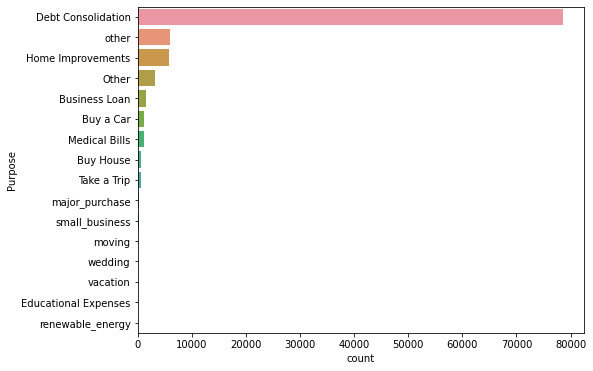

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=data, order = data['Purpose'].value_counts().index)

In [65]:
debtcons= data[data["Purpose"]=="Debt Consolidation"]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              80847 non-null   float64
 7   Years in current job       100000 non-null  float64
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

# Annual Income


In [67]:
data["Annual Income"].describe()

count    8.084700e+04
mean     1.378264e+06
std      1.081354e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174143e+06
75%      1.650634e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [68]:
data["Annual Income"].median()

1174143.0

In [69]:
data["Annual Income"].mean()

1378263.686160278

In [70]:
## Filling Nan values with median :
data["Annual Income"].fillna(data["Annual Income"].mean(), inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              100000 non-null  float64
 7   Years in current job       100000 non-null  float64
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

# Bankruptcies

In [72]:
data["Bankruptcies"].corr(data["Number of Credit Problems"])

0.7529419405196893

In [73]:
data["Bankruptcies"].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

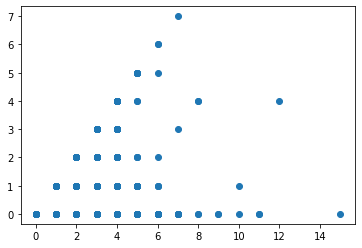

In [74]:
plt.scatter(x= 'Number of Credit Problems' , y='Bankruptcies' ,data= data )

In [75]:
data["Number of Credit Problems"].value_counts()

0.0     86035
1.0     12077
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
11.0        2
10.0        2
9.0         2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64

In [76]:
segm=data[data["Bankruptcies"].isna()]

In [77]:
segm["Number of Credit Problems"].value_counts()

0.0    196
1.0      8
Name: Number of Credit Problems, dtype: int64

In [78]:
### most of records in which Bankruptcies is missing have Number of Credit Problems equal to zero :
### and due to strong correlation between Number of Credit Problems and bankrupcies : I will fill them with 0

data["Bankruptcies"].fillna(0, inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              100000 non-null  float64
 7   Years in current job       100000 non-null  float64
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  100

# Tax Liens 

In [80]:
data["Tax Liens"].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [81]:
data["Tax Liens"].fillna(0, inplace=True)

In [82]:
# droping ID columns :
data_copy= data.copy()

In [83]:
data.drop("Loan ID", axis=1, inplace= True)

In [84]:
data.drop("Customer ID", axis=1, inplace= True)

# Encoding

In [85]:
label_encoder= LabelEncoder()

In [86]:
data['Purpose']= label_encoder.fit_transform(data['Purpose'])
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Ranges
0,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8.0,Home Mortgage,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,Good
1,Fully Paid,262328.0,Short Term,619.0,1.378264e+06,10.0,Home Mortgage,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,Fair
2,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8.0,Own Home,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,Very Good
3,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3.0,Own Home,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Good
4,Fully Paid,176220.0,Short Term,619.0,1.378264e+06,5.0,Rent,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,Fair


In [87]:
data['Home Ownership']= label_encoder.fit_transform(data['Home Ownership'])
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Ranges
0,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8.0,0,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,Good
1,Fully Paid,262328.0,Short Term,619.0,1.378264e+06,10.0,0,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,Fair
2,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8.0,1,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,Very Good
3,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3.0,1,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Good
4,Fully Paid,176220.0,Short Term,619.0,1.378264e+06,5.0,2,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,Fair


In [88]:
data['Term']= label_encoder.fit_transform(data['Term'])

In [89]:
data['Credit Ranges']= label_encoder.fit_transform(data['Credit Ranges'])

In [90]:
data['Loan Status']= label_encoder.fit_transform(data['Loan Status'])

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 90081
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  int64  
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  int64  
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  int64  
 7   Purpose                    100000 non-null  int64  
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

In [92]:
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Ranges'],
      dtype='object')

# VIF 

In [93]:
X = data[['Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Ranges']]

In [94]:
vif_data = pd.DataFrame()

In [95]:
vif_data["feature"] = X.columns

In [96]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [97]:
vif_data

,feature,VIF
0,Current Loan Amount,1.190077
1,Term,3.929874
2,Credit Score,29.532650
3,Annual Income,3.804517
4,Years in current job,4.439901
5,Home Ownership,2.207584
6,Purpose,3.834725
7,Monthly Debt,5.773105
8,Years of Credit History,8.816158
9,Number of Open Accounts,7.227062


In [98]:
data["Loan Status"].describe()

count    100000.00000
mean          0.77362
std           0.41849
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: Loan Status, dtype: float64

# Train test split

In [99]:
x =data.drop("Loan Status", axis=1).values
y = data["Loan Status"].values

In [100]:
x_train , x_test, y_train ,y_test= train_test_split(x, y, test_size=0.25, random_state=42)

In [101]:
ro_scaler = RobustScaler()

In [102]:
x_train= ro_scaler.fit_transform(x_train)

In [103]:
x_test = ro_scaler.fit_transform(x_test)

In [104]:
x_train.shape


(75000, 16)

In [105]:
x_test.shape


(25000, 16)

In [106]:
y_test.shape

(25000,)

In [107]:
y_train.shape

(75000,)

# Logistic Regression

In [108]:
lr= LogisticRegression()
lr.fit(x_train , y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.77276
0.77568


In [109]:
y_pred = lr.predict(x_test)
lrdata = pd.DataFrame({ "Y_test": y_test ,"Y_pred" : y_pred})
lrdata


,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1
...,...,...
24995,1,1
24996,0,1
24997,0,1
24998,1,1


In [110]:
type(lrdata)

pandas.core.frame.DataFrame

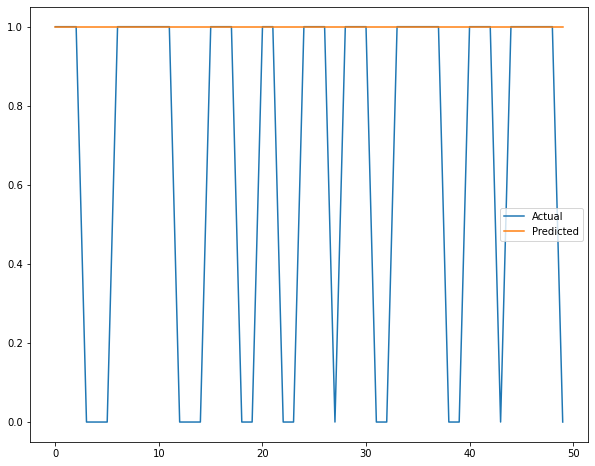

In [111]:
plt.figure(figsize=(10,8))
plt.plot(lrdata[:50])
plt.legend(["Actual","Predicted"])

# KNN 

In [112]:
knn = KNeighborsClassifier(n_neighbors=3)

In [113]:
knn.fit(x_train , y_train )

KNeighborsClassifier(n_neighbors=3)

In [114]:
print(knn.score(x_train , y_train))
print(knn.score(x_test , y_test))

0.8476
0.72828


In [115]:
y_pred1 = knn.predict(x_test)
knndata = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred1})

In [116]:
knndata

,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
24995,1,1
24996,0,1
24997,0,0
24998,1,1


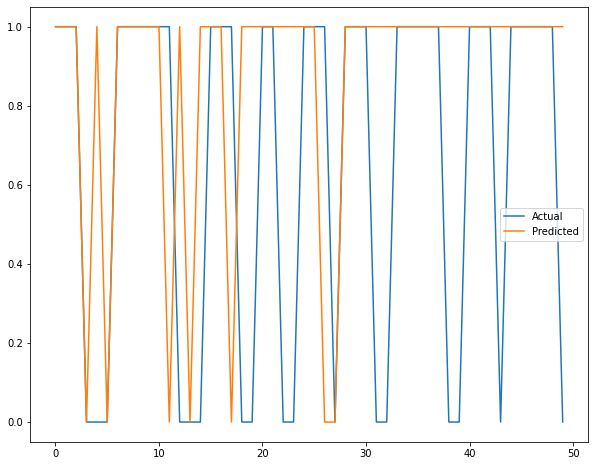

In [117]:
plt.figure(figsize=(10,8))
plt.plot(knndata[:50])
plt.legend(["Actual","Predicted"])